In [1]:
%matplotlib inline
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./dftRoadSafetyData_Vehicles_2018.csv',low_memory=False) # Remember to write you path
url = "http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv"

In [4]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [5]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [6]:
data.dtypes == int #Columns that are filled by numbers

Accident_Index                                 False
Location_Easting_OSGR                          False
Location_Northing_OSGR                         False
Longitude                                      False
Latitude                                       False
Police_Force                                    True
Accident_Severity                               True
Number_of_Vehicles                              True
Number_of_Casualties                            True
Date                                           False
Day_of_Week                                     True
Time                                           False
Local_Authority_(District)                      True
Local_Authority_(Highway)                      False
1st_Road_Class                                  True
1st_Road_Number                                 True
Road_Type                                       True
Speed_limit                                     True
Junction_Detail                               

In [7]:
ints = data.dtypes == int

In [8]:
num_cols = [i for i in ints.index if ints[i]]
num_cols

['Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

In [9]:
data_v2 = data[num_cols] # new data set with only numbers

In [10]:
data_v2.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,2,2,2,3,501,3,30,...,0,0,0,4,1,1,0,0,1,1
1,1,3,1,1,2,17,4,165,6,30,...,0,0,0,4,1,1,0,0,1,1
2,1,3,2,1,2,3,3,1,6,20,...,0,0,5,4,1,1,0,0,1,1
3,1,2,2,1,2,17,4,167,3,30,...,124,0,5,4,2,2,0,0,1,1
4,1,2,2,2,2,6,3,207,6,30,...,0,0,0,4,1,2,0,0,1,1


# Values

In [11]:
index = ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']
for i in index:
    print(data_v2[i].value_counts())

1     25390
20     5490
46     4403
13     4132
44     3957
47     3859
43     3832
6      3762
50     3448
4      3379
42     3163
45     3113
52     2956
97     2755
14     2469
31     2433
10     2340
16     2305
5      2287
41     2053
7      2029
32     1882
35     1803
22     1788
36     1782
30     1661
12     1620
33     1586
40     1498
95     1471
62     1465
37     1463
21     1417
55     1324
54     1286
3      1244
23     1212
63     1140
34     1041
60      985
11      951
53      778
61      624
17      608
91      438
92      422
93      405
94      328
96      328
48      272
98      258
Name: Police_Force, dtype: int64
3    97799
2    23165
1     1671
Name: Accident_Severity, dtype: int64
2     74120
1     35845
3      9692
4      2179
5       526
6       146
7        75
8        24
9        15
10        6
16        3
24        1
18        1
13        1
11        1
Name: Number_of_Vehicles, dtype: int64
1     97143
2     17694
3      5035
4      1738
5       596
6    

# Graphics 

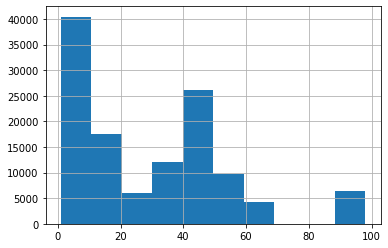

In [12]:
data_v2['Police_Force'].hist() # most of police_force are Metropolitan Police

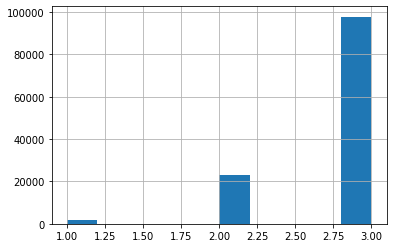

In [13]:
data_v2['Accident_Severity'].hist() #most of accidentes severity are slight

In [14]:
(data_v2['Number_of_Vehicles'] <= 3).value_counts()

True     119657
False      2978
Name: Number_of_Vehicles, dtype: int64

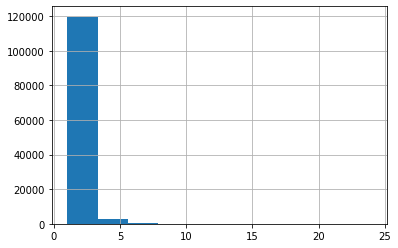

In [15]:
data_v2['Number_of_Vehicles'].hist() # most of number of vehicles in accidents are 2

In [16]:
(data_v2['Number_of_Vehicles'] > 20).value_counts() # only one case had more than 20 vehicles

False    122634
True          1
Name: Number_of_Vehicles, dtype: int64

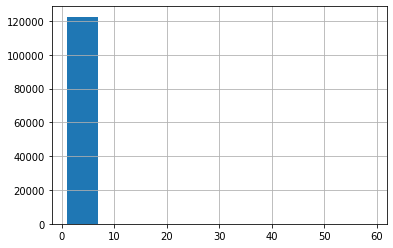

In [17]:
data_v2['Number_of_Casualties'].hist() # most of the numeber of casualties are 1

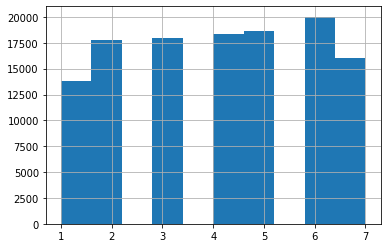

In [18]:
data_v2['Day_of_Week'].hist() # most of accident occurs on Fridays

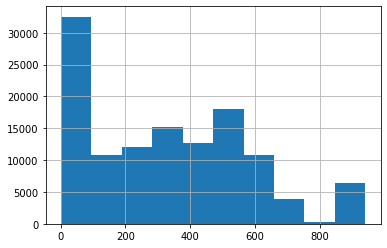

In [19]:
data_v2['Local_Authority_(District)'].hist() # It can be seen thatthe highest pick is tacken by the locals Authority on 0 - 100  Indexes, but the highest score is for the Birmingham (See values)

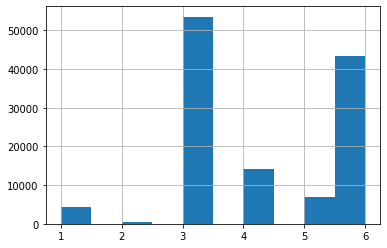

In [20]:
data_v2['1st_Road_Class'].hist() # the class A (3 in graphic) has more accidents

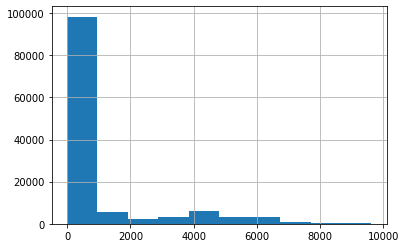

In [21]:
data_v2['1st_Road_Number'].hist()

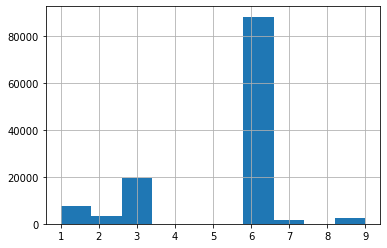

In [22]:
data_v2['Road_Type'].hist()# most of the accidents take place at a Single carriageway identified by the number 6

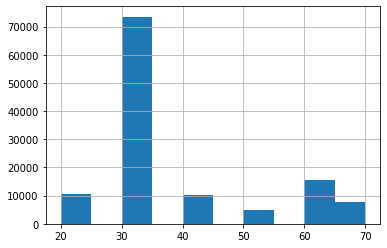

In [23]:
data_v2['Speed_limit'].hist() # most of the accidents occurs in places where the speed limit is 30 mph

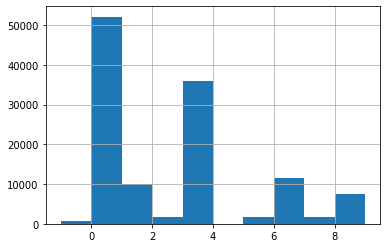

In [24]:
data_v2['Junction_Detail'].hist() # most of accidents occurs in Not at junction or within 20 metres 

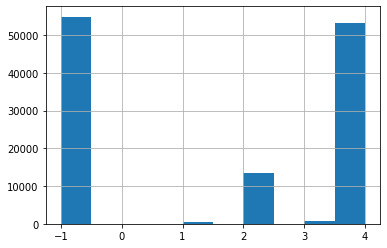

In [25]:
data_v2['Junction_Control'].hist() # most of data is missing or out of range, but the second is Give way or uncontrolled as a junction control

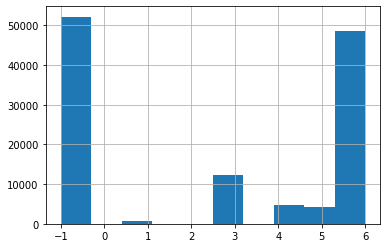

In [26]:
data_v2['2nd_Road_Class'].hist() # most of the accident have missing data , but it can also be seen that the second category with a big amount of accidents is Not classified

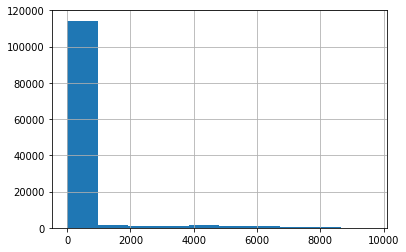

In [27]:
data_v2['2nd_Road_Number'].hist()

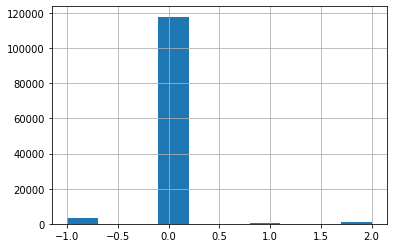

In [28]:
data_v2['Pedestrian_Crossing-Human_Control'].hist() # more of accident in this category ar classified with None within 50 metres 

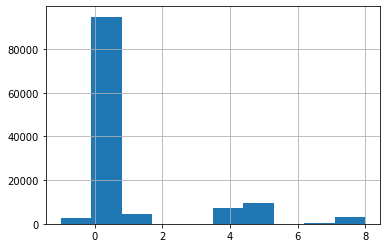

In [29]:
data_v2['Pedestrian_Crossing-Physical_Facilities'].hist() # most of accidents ar classified with No physical crossing facilities within 50 metres

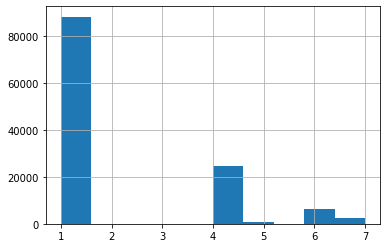

In [30]:
data_v2['Light_Conditions'].hist() # most of accident occur with Daylight (1) 

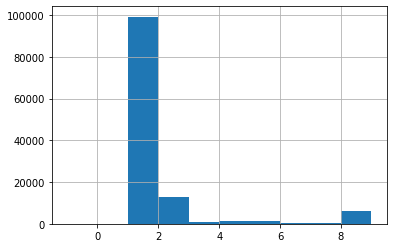

In [31]:
data_v2['Weather_Conditions'].hist() # accidents are more likely the weather condition is Raining no high winds

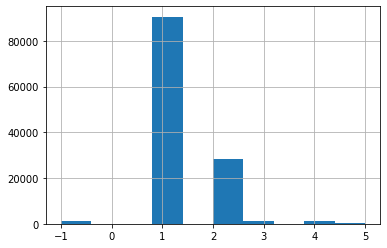

In [32]:
data_v2['Road_Surface_Conditions'].hist() # most of accidents occur when the road is Dry

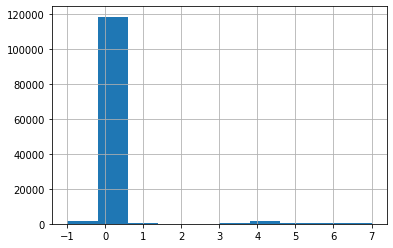

In [33]:
data_v2['Special_Conditions_at_Site'].hist() #Accidents are more probable with no special conditions

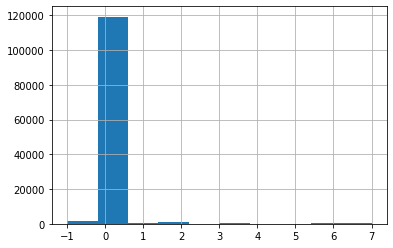

In [34]:
data_v2['Carriageway_Hazards'].hist() # accidents are relate with no hazards

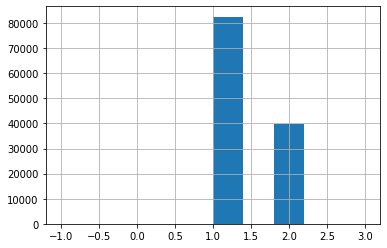

In [35]:
data_v2['Urban_or_Rural_Area'].hist() # accidents happen more in Urban areas

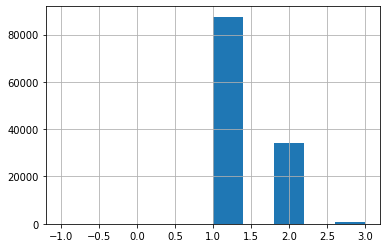

In [36]:
data_v2['Did_Police_Officer_Attend_Scene_of_Accident'].hist() # in most of cases a Police Officer Attend the scene of accidents

# Applying ML

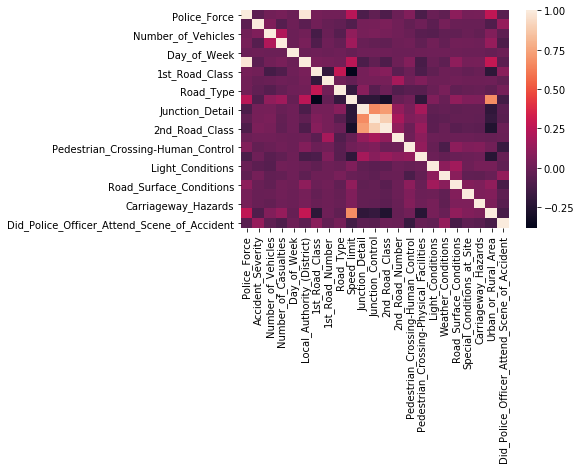

In [37]:
import seaborn as sns
%matplotlib inline
sns.heatmap(data_v2.corr())
#checking correlation

##  Unsupervised ML

In [38]:
from sklearn.cluster import KMeans

In [39]:
WSS = []
for i in range(1,10):
  model = KMeans(n_clusters = i , max_iter = 1000)
  model.fit(data_v2.drop('Accident_Severity',axis=1))
  WSS.append(model.inertia_)
  print('WSS:',WSS[-1]) 

WSS: 506739685521.1137
WSS: 207264463339.6509
WSS: 106391227506.39244
WSS: 75002625074.88983
WSS: 55444328372.91162
WSS: 45797985498.59824
WSS: 38776685577.17873
WSS: 32733886988.752853
WSS: 28175843229.75139


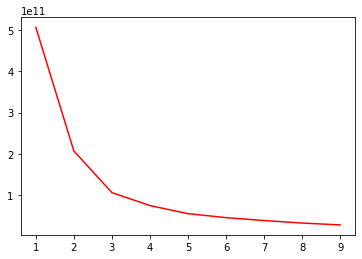

In [40]:
plt.plot(range(1,len(WSS)+1),WSS,'r-')
# the best number of cluster is 3, taking Accident Severity as this category
#applying Elbow Method

In [41]:
model1 = KMeans(n_clusters = 3 , max_iter = 3000)
model1.fit(data_v2.drop('Accident_Severity',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
x = data_v2.drop('Accident_Severity',axis=1)

In [43]:
y = model1.predict(x)

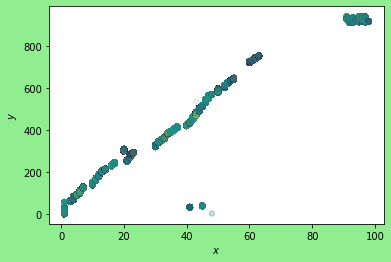

In [44]:
plt.figure(facecolor='lightgreen')
plt.scatter(x['Police_Force'],x['Local_Authority_(District)'], c=y , s = 30, alpha = 0.1)
plt.xlabel('$x$', fontsize = 10)
plt.ylabel('$y$', fontsize = 10)
plt.show()


In [45]:
predicted = pd.Series(model1.labels_).value_counts()
predicted

1    102597
0     14387
2      5651
dtype: int64

In [46]:
real = data_v2['Accident_Severity'].value_counts()
real

3    97799
2    23165
1     1671
Name: Accident_Severity, dtype: int64

In [59]:
error = (np.abs((predicted[0]-real[3]))/real[3])*100
print(error)
error = (np.abs(predicted[1]-real[2])/real[2])*100
print(error)
error = (np.abs(predicted[2]-real[1])/real[1])*100
print(error)
    

85.2892156361517
342.89661126699764
238.1807301017355


## Supervised ML

In [48]:
from sklearn.tree import DecisionTreeClassifier as DTR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [49]:
y = data_v2['Accident_Severity']
X = data_v2.drop('Accident_Severity',axis=1)

In [50]:
X_train, X_test,y_train , y_test = train_test_split(X,y,random_state= 1)

In [51]:
model2 = DTR(max_depth = 50)

In [52]:
results = cross_validate(model2,X_train,y_train,return_train_score=True,cv=5)
results

{'fit_time': array([1.2704072 , 1.16224265, 0.97961044, 1.0509367 , 0.99855566]),
 'score_time': array([0.02078533, 0.01325297, 0.0132668 , 0.01331377, 0.01324487]),
 'test_score': array([0.67222917, 0.6795499 , 0.6739875 , 0.66885941, 0.67244754]),
 'train_score': array([0.99370744, 0.9937483 , 0.99347658, 0.9930146 , 0.9937077 ])}

In [53]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_predict = pd.Series(np.int64(model2.predict(X_test)),index=y_test.index,name='Accident_Severity_Predicted')

In [55]:
Y = pd.concat((y_predict,y_test),axis=1)

In [56]:
y_right_predicted =  Y['Accident_Severity_Predicted'][Y['Accident_Severity_Predicted']==Y['Accident_Severity']].value_counts()

In [57]:
y_real_values = y_test.value_counts()

In [58]:
error = (np.abs(y_right_predicted[3]-y_real_values[3])/y_real_values[3])*100
print('Case 3 error prediction:',error)
error = (np.abs(y_right_predicted[2]-y_real_values[2])/y_real_values[2])*100
print('Case 2 error prediction:',error)
error = (np.abs(y_right_predicted[1]-y_real_values[1])/y_real_values[1])*100
print('Case 1 error prediction:',error)


Case 3 error prediction: 21.814025634745693
Case 2 error prediction: 74.60815047021944
Case 1 error prediction: 95.4653937947494
